## Assignment 3
Haider, Shabih, 21027325

In [10]:
import numpy as np
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster


In [2]:
# This function reads the data file and manipulates dataframe into our desired format
def world_bank_dfParser(df_file_name):
    df = pd.read_csv(df_file_name, index_col=[0,1])
    
    # Returning 2 Data Frames, One with years as columns, other with countries as columns
    return df, df.T   

In [36]:
# This function retrieves data from world bank website and saves it into a file
def get_world_bank_data(c_codes):
    # Indicator ids
    indicator_ids = ['EG.USE.PCAP.KG.OE', 'EN.ATM.METH.KT.CE', 'EN.ATM.GHGT.KT.CE']
    print(wb.series.info(indicator_ids))
    
    # Fetching data from World bank for listed countries and indicators
    wb_dataframe = wb.data.DataFrame(indicator_ids, country_codes, time=range(1990, 2015)) # retrieving data for 1990 - 2015
    
    # Renaming indicator Ids with actual names
    wb_dataframe = wb_dataframe.rename(index={
        'EG.USE.PCAP.KG.OE' : 'Energy use', 
        'EN.ATM.METH.KT.CE' : 'Methane emissions', 
        'EN.ATM.GHGT.KT.CE' : 'Total greenhouse gas emissions'
    })
    
    # Renaming country and indicator column names
    wb_dataframe.index.rename(['Country', 'Indicators'], inplace=True)
    
    # Checking for null values in dataframe
    display("Checking null values in DataFrame")
    display(wb_dataframe.isnull().sum())
    
    # Writing received data to csv file
    print('Writing data to csv file.......')
    wb_dataframe.to_csv('wb_dataframe.csv', index=True)
    print('Done')
    


In [37]:
# Selected countries
country_codes = ['CHN', 'FRA', 'DEU', 'IND', 'USA', 'WLD']
country_names = {
    "CHN" : "China",
    "FRA" : "France",
    "DEU" : "Germany",
    "IND" : "India",
    "USA" : "United States",
    "WLD" : "World"
}

# This following function is used to fetch the data from WB API. Only call this function if you want to update the data.
get_world_bank_data(country_codes)

df_1, df_2 = world_bank_dfParser('wb_dataframe.csv')

id                 value
-----------------  -----------------------------------------------------
EG.USE.PCAP.KG.OE  Energy use (kg of oil equivalent per capita)
EN.ATM.METH.KT.CE  Methane emissions (kt of CO2 equivalent)
EN.ATM.GHGT.KT.CE  Total greenhouse gas emissions (kt of CO2 equivalent)
                   3 elements


'Checking null values in DataFrame'

YR1990    0
YR1991    0
YR1992    0
YR1993    0
YR1994    0
YR1995    0
YR1996    0
YR1997    0
YR1998    0
YR1999    0
YR2000    0
YR2001    0
YR2002    0
YR2003    0
YR2004    0
YR2005    0
YR2006    0
YR2007    0
YR2008    0
YR2009    0
YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
dtype: int64

Writing data to csv file.......
Done


In [38]:
# Some statistical information about the data. Statistical analysis is performed on all years.
df_2.groupby(['Country', 'Indicators'], axis = 1).describe()

count          mean           std  \
Country Indicators                                                          
CHN     Energy use                       25.0  1.281458e+03  5.283776e+02   
        Total greenhouse gas emissions   25.0  6.569674e+06  2.973959e+06   
        Methane emissions                25.0  8.907820e+05  1.453597e+05   
DEU     Energy use                       25.0  4.085274e+03  1.534668e+02   
        Total greenhouse gas emissions   25.0  9.767720e+05  9.216874e+04   
        Methane emissions                25.0  8.705400e+04  2.479414e+04   
FRA     Energy use                       25.0  4.046713e+03  1.728803e+02   
        Total greenhouse gas emissions   25.0  4.935256e+05  2.532311e+04   
        Methane emissions                25.0  7.133560e+04  5.246420e+03   
IND     Energy use                       25.0  4.535819e+02  8.680497e+01   
        Total greenhouse gas emissions   25.0  1.931212e+06  5.457523e+05   
        Methane emissions                25.0  5.975160e+05  4.548670e+04   
USA     Energy use                       25.0  7.591699e+03  3.599814e+02   
        Total greenhouse gas emissions   25.0  6.430367e+06  3.254153e+05   
        Methane emissions                25.0  6.853524e+05  5.182480e+04   
WLD     Energy use                       25.0  1.723388e+03  1.115220e+02   
        Total greenhouse gas emissions   25.0  3.564451e+07  5.147989e+06   
        Methane emissions                25.0  7.177904e+06  4.270915e+05   

                                                 min           25%  \
Country Indicators                                                   
CHN     Energy use                      7.368518e+02  8.693586e+02   
        Total greenhouse gas emissions  3.222270e+06  4.302870e+06   
        Methane emissions               7.303400e+05  7.984500e+05   
DEU     Energy use                      3.779462e+03  3.997079e+03   
        Total greenhouse gas emissions  8.436600e+05  9.051300e+05   
        Methane emissions               5.716000e+04  6.351000e+04   
FRA     Energy use                      3.659088e+03  3.913458e+03   
        Total greenhouse gas emissions  4.241300e+05  4.853500e+05   
        Methane emissions               6.186000e+04  6.774000e+04   
IND     Energy use                      3.500757e+02  3.894265e+02   
        Total greenhouse gas emissions  1.226440e+06  1.509060e+06   
        Methane emissions               5.227400e+05  5.607400e+05   
USA     Energy use                      6.872027e+03  7.488082e+03   
        Total greenhouse gas emissions  5.918730e+06  6.129040e+06   
        Methane emissions               6.181500e+05  6.499400e+05   
WLD     Energy use                      1.599006e+03  1.626406e+03   
        Total greenhouse gas emissions  2.984857e+07  3.137967e+07   
        Methane emissions               6.749630e+06  6.808320e+06   

                                                 50%           75%  \
Country Indicators                                                   
CHN     Energy use                      9.848107e+02  1.672904e+03   
        Total greenhouse gas emissions  5.100860e+06  8.786120e+06   
        Methane emissions               8.256900e+05  9.735800e+05   
DEU     Energy use                      4.094060e+03  4.190984e+03   
        Total greenhouse gas emissions  9.729300e+05  1.055730e+06   
        Methane emissions               8.488000e+04  1.088600e+05   
FRA     Energy use                      4.049233e+03  4.188843e+03   
        Total greenhouse gas emissions  5.027500e+05  5.107000e+05   
        Methane emissions               7.302000e+04  7.617000e+04   
IND     Energy use                      4.212705e+02  5.015596e+02   
        Total greenhouse gas emissions  1.763940e+06  2.309340e+06   
        Methane emissions               5.947000e+05  6.441400e+05   
USA     Energy use                      7.757831e+03  7.828581e+03   
        Total greenhouse gas emissions  6.442580

In [39]:
def norm(array):
    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled

def norm_df(df):
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [40]:
# normalise result and inspect results
normalised_df = norm_df(df_2)
print(normalised_df.describe())
print()


Country             CHN                                                   \
Indicators   Energy use Total greenhouse gas emissions Methane emissions   
count         25.000000                      25.000000         25.000000   
mean        1281.457965                       0.387295          0.337155   
std          528.377551                       0.344087          0.305461   
min          736.851801                       0.000000          0.000000   
25%          869.358607                       0.125025          0.143127   
50%          984.810715                       0.217353          0.200370   
75%         1672.904120                       0.643738          0.511148   
max         2224.354898                       1.000000          1.000000   

Country           DEU                                                   \
Indicators Energy use Total greenhouse gas emissions Methane emissions   
count       25.000000                      25.000000         25.000000   
mean         0.47

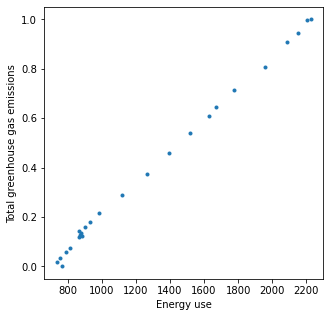

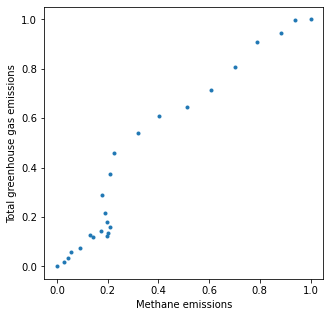

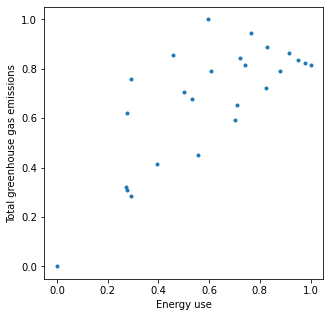

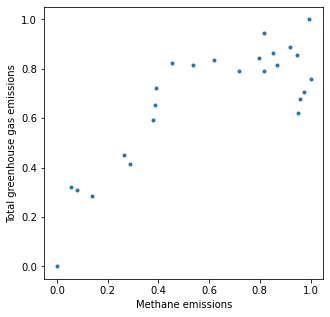

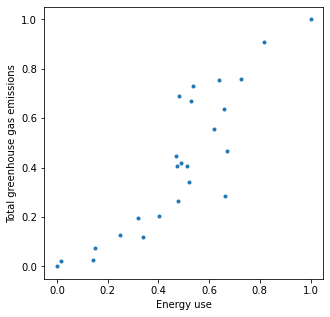

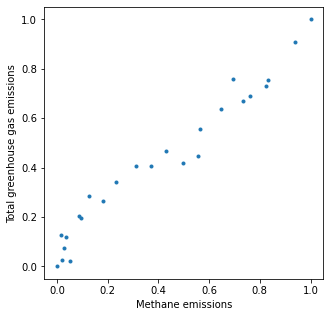

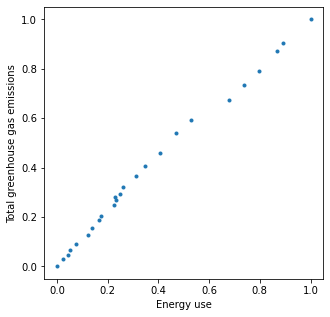

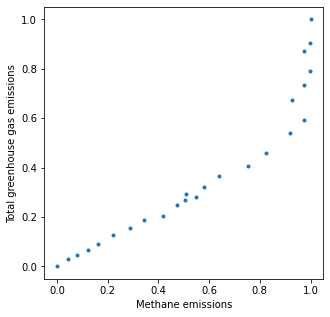

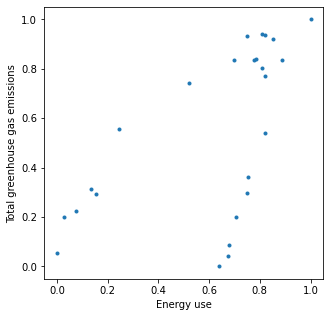

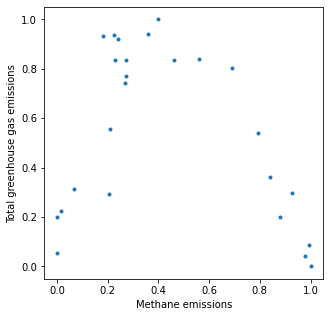

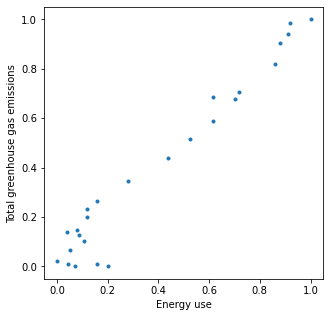

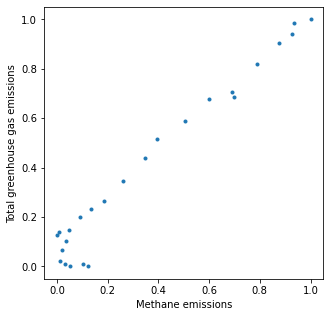

In [41]:
def makeplot(df, col1, col2):
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
for code in country_codes:
    makeplot(df_2[code], "Energy use", "Total greenhouse gas emissions")
    makeplot(df_2[code], "Methane emissions", "Total greenhouse gas emissions")

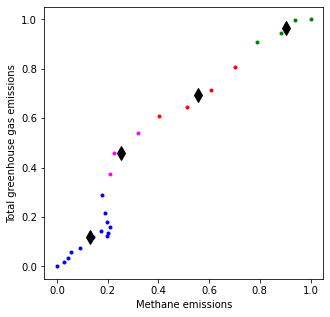

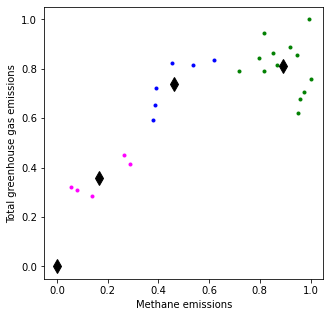

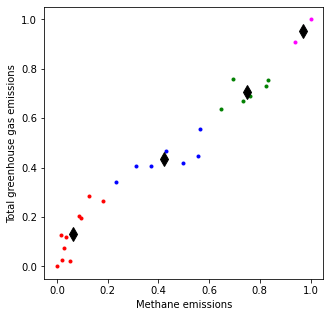

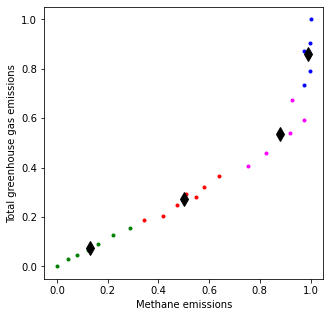

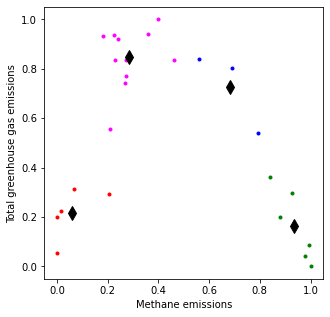

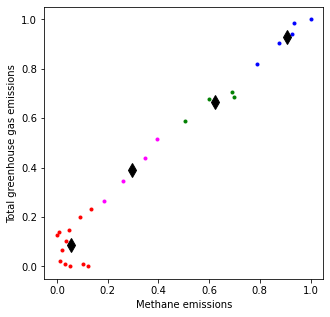

In [44]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
for code in country_codes:
    df_fit = df_2[code][["Methane emissions", "Total greenhouse gas emissions"]].copy()
    kmeans.fit(df_fit)     

    # extract labels and cluster centres
    labels = kmeans.labels_
    cen = kmeans.cluster_centers_

    # plot using the labels to select colour
    plt.figure(figsize=(5.0,5.0))

    col = ["blue", "red", "green", "magenta"]
    for l in range(4):     # loop over the different labels
        plt.plot(df_fit["Methane emissions"][labels==l], df_fit["Total greenhouse gas emissions"][labels==l], "o", markersize=3, color=col[l])

    # show cluster centres
    for ic in range(4):
        xc, yc = cen[ic,:]
        plt.plot(xc, yc, "dk", markersize=10)

    plt.xlabel("Methane emissions")
    plt.ylabel("Total greenhouse gas emissions")
    plt.show()

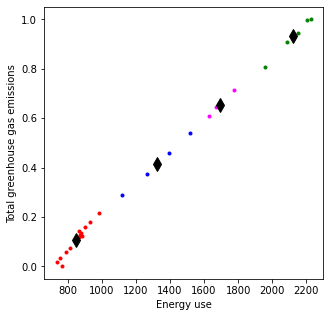

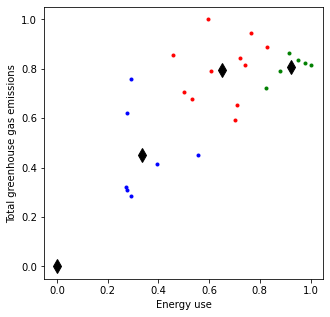

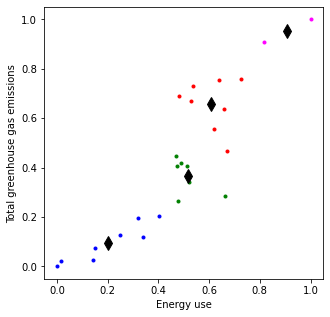

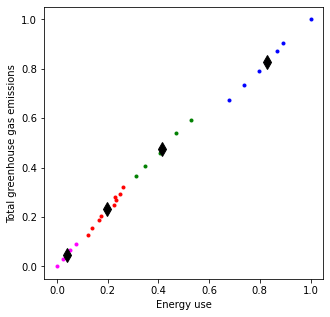

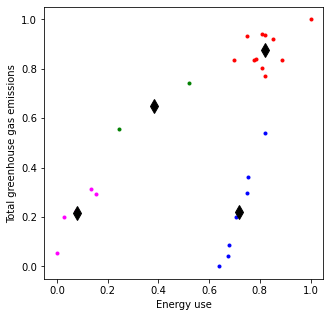

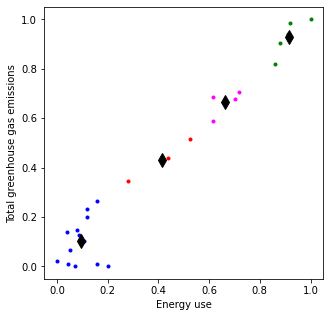

In [47]:
##### setting up agglomerative clustering for 4 clusters
ac = cluster.AgglomerativeClustering(n_clusters=4)

for code in country_codes:
    df_fit = df_2[code][["Energy use", "Total greenhouse gas emissions"]].copy()

    # carry out the fitting
    ac.fit(df_fit)

    labels = ac.labels_

    # The clusterer does not return cluster centres, but they are easily computed
    xcen = []
    ycen = []
    for ic in range(4):
        xc = np.average(df_fit["Energy use"][labels==ic])
        yc = np.average(df_fit["Total greenhouse gas emissions"][labels==ic])
        xcen.append(xc)
        ycen.append(yc)

    # plot using the labels to select colour
    plt.figure(figsize=(5.0,5.0))

    col = ["blue", "red", "green", "magenta"]
    for l in range(0,4):     # loop over the different labels
        plt.plot(df_fit["Energy use"][labels==l], df_fit["Total greenhouse gas emissions"][labels==l], "o", markersize=3, color=col[l])

    # show cluster centres
    for ic in range(4):
        plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)

    plt.xlabel("Energy use")
    plt.ylabel("Total greenhouse gas emissions")
    plt.show()